# pandas exercises

We'll use the sample datset from the Social Secury Administration on baby names:
https://www.ssa.gov/oact/babynames/limits.html

Download the "National" version and unzip it.  There will be one file for each year.

This example follows the _Python for Data Analysis_ book closely

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Let's start by reading in just a single dataset, for the first year available (1880).  We give the names of the colums here.  The index will just be the line / record number in the file (not really important for us)

In [2]:
names_1880 = pd.read_csv('babynames/yob1880.txt', names=["name", "sex", "births"])
names_1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


## number of births

Now we want to start doing some analysis.  `.groupby()` creates a new type of container that groups items.  Here, we'll group by sex.

See this:
http://pandas.pydata.org/pandas-docs/stable/groupby.html
https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/

for a nice explanation of this method.

In [3]:
names_1880.groupby("sex")["births"].sum()

sex
F     90992
M    110491
Name: births, dtype: int64

Note that we can use a column name as a parameter of the object, so we can equivalently do this as:

In [4]:
names_1880.groupby("sex").births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

On its own, you can't print a `GroupBy` object.  You need to do a transformation or filter on it to get back a `Series` or `DataFrame`.

In [5]:
gb = names_1880.groupby("sex")
gb.count()

,name,births
sex,,
F,942,942
M,1058,1058


As we saw in the intro, we can propagate a scalar to all indices in the `DataFrame`.  We'll use this to add a new column that represents the year:

In [6]:
names_1880["year"] = 1880
names_1880

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## all data sets

Now we can read in all of the datasets.  We will read them in one-by-one and add the "year" column to them.  We'll keep a list of all the `DataFrame`s and then we'll use a pandas method to transform this list of `DataFrame`s into a single `DataFrame`

In [7]:
years = range(1880, 2017)

pieces = []
columns = ["name", "sex", "births"]

for yr in years:
    frame = pd.read_csv("babynames/yob{}.txt".format(yr), names=columns)
    
    # this creates a new column and gives all rows the same value -- the year
    frame["year"] = yr
    pieces.append(frame)

# create a single dataframe through concatenation -- ignore_index means that
# we don't care about the original line numbers
names = pd.concat(pieces, ignore_index=True)

In [8]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## pivot tables

a _pivot table_ creates a new dataframe from our orignal one, usually summarizing the data in a new way.  In particular, with a pivot table, we can create a new index and columns, with the data in the `DataFrame` reduced via some operation across another column.

Here, the column that we are going to aggregrate is "births", and the function will will use for the aggregating (e.g., `np.mean`).  Here we'll use `sum`.

In [9]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)

In [10]:
total_births

sex,F,M
year,,
1880,90992,110491
1881,91953,100743
1882,107847,113686
1883,112318,104627
1884,129020,114443
1885,133055,107799
1886,144533,110784
1887,145981,101415
1888,178624,120851


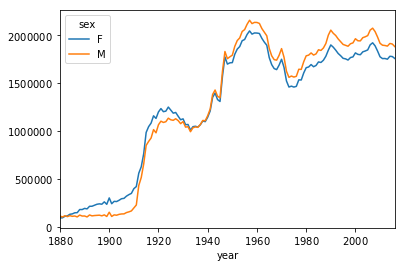

In [11]:
total_births.plot()

## `.apply()` and new columns

Now we'll use `.groupby()` again to allow use to derive a new column -- the fraction of the births with the name specified by the index.  

`apply()` uses what Pandas calls the _split-apply-combine_ rules, e.g., it splits the data into groups, applies your function, and then intelligently concatenates it back together.  Here, the result will be a `DataFrame` with the original information and this new column.

In [12]:
def add_prop(group):
    group["prop"] = group["births"]/group["births"].sum()
    return group

names = names.groupby(["year", "sex"]).apply(add_prop)

In [13]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


Now we will group by "year" and "sex" and then sort by births to get just the top N most popular names.

Notice that we simply append any additional arguments to our apply function after the function name (this is an example of the `**kwargs` behavior in python

In [14]:
def get_top(group, N=1000):
    return group.sort_values(by="births", ascending=False)[:N]

grouped = names.groupby(["year", "sex"])
top = grouped.apply(get_top, 1000)

In [15]:
top

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077644
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021310
         4           Minnie   F    1746  1880  0.019189
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011485
         15          Martha   F    1040  1880  0.011430
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     796  1880  0.008748
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2016 M   1878753      Keanu   M     210  2016  0.000112
         1878754     Konner   M     210  2016  0.000112
         1878755      Brent   M     209  2016  0.000111
         1878756   Immanuel   M     209  2016  0.000111
         1878757    Benicio   M     208  2016  0.000111
         1878758     Ernest   M     208  2016  0.000111
         1878759    Merrick   M     208  2016  0.000111
         1878760    Yisroel   M     208  2016  0.000111
         1878763       Lyle   M     207  2016  0.000110
         1878761      Amare   M     207  2016  0.000110
         1878762        Jad   M     207  2016  0.000110
         1878766     Maddux   M     206  2016  0.000110
         1878764      Creed   M     206  2016  0.000110
         1878765      Krish   M     206  2016  0.000110
         1878768  Giancarlo   M     205  2016  0.000109
         1878769   Jamarion   M     205  2016  0.000109
         1878770      Steve   M     205  2016  0.000109
         1878767     Camilo   M     205  2016  0.000109
         1878771      Anton   M     204  2016  0.000108
         1878772      Jamar   M     204  2016  0.000108
         1878773   Jeremias   M     204  2016  0.000108
         1878774      Ralph   M     204  2016  0.000108
         1878775     Wesson   M     204  2016  0.000108
         1878778    Brenden   M     203  2016  0.000108
         1878779    Eliezer   M     203  2016  0.000108
         1878777    Braeden   M     203  2016  0.000108
         1878776       Bode   M     203  2016  0.000108
         1878780     Davian   M     202  2016  0.000107
         1878781        Gus   M     202  2016  0.000107
         1878782   Jonathon   M     202  2016  0.000107

[273877 rows x 5 columns]

In [16]:
boys = top[top.sex == "M"]

In [17]:
boys

name sex  births  year      prop
year sex                                               
1880 M   942           John   M    9655  1880  0.087383
         943        William   M    9532  1880  0.086269
         944          James   M    5927  1880  0.053642
         945        Charles   M    5348  1880  0.048402
         946         George   M    5126  1880  0.046393
         947          Frank   M    3242  1880  0.029342
         948         Joseph   M    2632  1880  0.023821
         949         Thomas   M    2534  1880  0.022934
         950          Henry   M    2444  1880  0.022119
         951         Robert   M    2415  1880  0.021857
         952         Edward   M    2364  1880  0.021395
         953          Harry   M    2152  1880  0.019477
         954         Walter   M    1755  1880  0.015884
         955         Arthur   M    1599  1880  0.014472
         956           Fred   M    1569  1880  0.014200
         957         Albert   M    1493  1880  0.013512
         958         Samuel   M    1024  1880  0.009268
         959          David   M     869  1880  0.007865
         960          Louis   M     828  1880  0.007494
         961            Joe   M     731  1880  0.006616
         962        Charlie   M     730  1880  0.006607
         963       Clarence   M     730  1880  0.006607
         964        Richard   M     728  1880  0.006589
         965         Andrew   M     644  1880  0.005829
         966         Daniel   M     643  1880  0.005819
         967         Ernest   M     615  1880  0.005566
         968           Will   M     588  1880  0.005322
         969          Jesse   M     569  1880  0.005150
         970          Oscar   M     544  1880  0.004923
         971          Lewis   M     517  1880  0.004679
...                     ...  ..     ...   ...       ...
2016 M   1878753      Keanu   M     210  2016  0.000112
         1878754     Konner   M     210  2016  0.000112
         1878755      Brent   M     209  2016  0.000111
         1878756   Immanuel   M     209  2016  0.000111
         1878757    Benicio   M     208  2016  0.000111
         1878758     Ernest   M     208  2016  0.000111
         1878759    Merrick   M     208  2016  0.000111
         1878760    Yisroel   M     208  2016  0.000111
         1878763       Lyle   M     207  2016  0.000110
         1878761      Amare   M     207  2016  0.000110
         1878762        Jad   M     207  2016  0.000110
         1878766     Maddux   M     206  2016  0.000110
         1878764      Creed   M     206  2016  0.000110
         1878765      Krish   M     206  2016  0.000110
         1878768  Giancarlo   M     205  2016  0.000109
         1878769   Jamarion   M     205  2016  0.000109
         1878770      Steve   M     205  2016  0.000109
         1878767     Camilo   M     205  2016  0.000109
         1878771      Anton   M     204  2016  0.000108
         1878772      Jamar   M     204  2016  0.000108
         1878773   Jeremias   M     204  2016  0.000108
         1878774      Ralph   M     204  2016  0.000108
         1878775     Wesson   M     204  2016  0.000108
         1878778    Brenden   M     203  2016  0.000108
         1878779    Eliezer   M     203  2016  0.000108
         1878777    Braeden   M     203  2016  0.000108
         1878776       Bode   M     203  2016  0.000108
         1878780     Davian   M     202  2016  0.000107
         1878781        Gus   M     202  2016  0.000107
         1878782   Jonathon   M     202  2016  0.000107

[136997 rows x 5 columns]

## More analysis

How many times does each name appear, by year?

In [18]:
total_births = top.pivot_table("births", index="year", columns="name", aggfunc=sum)

/home/zingale/.local/lib/python3.6/site-packages/pandas/core/reshape/pivot.py:135: FutureWarning: 'year' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys)


In [19]:
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,...,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri,Zyaire
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,...,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,...,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,...,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,...,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN,NaN
1886,NaN,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN,NaN
1887,NaN,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,...,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN,NaN
1888,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,...,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN,NaN


In [20]:
total_births["John"]

year
1880     9701.0
1881     8795.0
1882     9597.0
1883     8934.0
1884     9428.0
1885     8801.0
1886     9074.0
1887     8166.0
1888     9299.0
1889     8600.0
1890     8558.0
1891     7724.0
1892     9093.0
1893     8110.0
1894     8298.0
1895     8381.0
1896     8188.0
1897     7596.0
1898     8214.0
1899     7030.0
1900     9875.0
1901     6939.0
1902     7945.0
1903     7649.0
1904     8148.0
1905     8104.0
1906     8308.0
1907     9048.0
1908     9400.0
1909     9658.0
         ...   
1987    29735.0
1988    29565.0
1989    29840.0
1990    29070.0
1991    27797.0
1992    26242.0
1993    24988.0
1994    24177.0
1995    23234.0
1996    22172.0
1997    21375.0
1998    20617.0
1999    20343.0
2000    20087.0
2001    18884.0
2002    17443.0
2003    17225.0
2004    16445.0
2005    15761.0
2006    15157.0
2007    14428.0
2008    13313.0
2009    12109.0
2010    11550.0
2011    11033.0
2012    10611.0
2013    10695.0
2014    10675.0
2015    10360.0
2016     9952.0
Name: John, Length:

In [21]:
top[top.name=="John"]

name sex  births  year      prop
year sex                                          
1880 F   228      John   F      46  1880  0.000506
     M   942      John   M    9655  1880  0.087383
1881 F   2312     John   F      26  1881  0.000283
     M   2938     John   M    8769  1881  0.087043
1882 F   4212     John   F      40  1882  0.000371
     M   4963     John   M    9557  1882  0.084065
1883 F   6340     John   F      40  1883  0.000356
     M   7116     John   M    8894  1883  0.085007
1884 F   8454     John   F      40  1884  0.000310
     M   9318     John   M    9388  1884  0.082032
1885 F   10739    John   F      45  1885  0.000338
     M   11640    John   M    8756  1885  0.081225
1886 F   13036    John   F      48  1886  0.000332
     M   14019    John   M    9026  1886  0.081474
1887 F   15414    John   F      56  1887  0.000384
     M   16435    John   M    8110  1887  0.079968
1888 F   17834    John   F      52  1888  0.000291
     M   18976    John   M    9247  1888  0.076516
1889 F   20498    John   F      52  1889  0.000292
     M   21632    John   M    8548  1889  0.077301
1890 F   23086    John   F      56  1890  0.000294
     M   24277    John   M    8502  1890  0.076577
1891 F   25816    John   F      44  1891  0.000237
     M   26971    John   M    7680  1891  0.075896
1892 F   28460    John   F      54  1892  0.000254
     M   29759    John   M    9039  1892  0.074068
1893 F   31361    John   F      61  1893  0.000287
     M   32671    John   M    8049  1893  0.071663
1894 F   34211    John   F      60  1894  0.000269
     M   35552    John   M    8238  1894  0.071159
...                ...  ..     ...   ...       ...
1988 F   1024422  John   F     167  1988  0.000094
     M   1037321  John   M   29398  1988  0.015368
1989 M   1060354  John   M   29840  1989  0.014919
1990 M   1084815  John   M   29070  1990  0.014161
1991 M   1109755  John   M   27797  1991  0.013764
1992 M   1135014  John   M   26242  1992  0.013144
1993 M   1160627  John   M   24988  1993  0.012745
1994 M   1186542  John   M   24177  1994  0.012518
1995 M   1212538  John   M   23234  1995  0.012208
1996 M   1238756  John   M   22172  1996  0.011709
1997 M   1265449  John   M   21375  1997  0.011343
1998 M   1292855  John   M   20617  1998  0.010791
1999 M   1321094  John   M   20343  1999  0.010600
2000 M   1350354  John   M   20087  2000  0.010234
2001 M   1380434  John   M   18884  2001  0.009726
2002 M   1410814  John   M   17443  2002  0.008991
2003 M   1441721  John   M   17225  2003  0.008727
2004 M   1473300  John   M   16445  2004  0.008292
2005 M   1505701  John   M   15761  2005  0.007898
2006 M   1539111  John   M   15157  2006  0.007383
2007 M   1573701  John   M   14428  2007  0.006960
2008 M   1608544  John   M   13313  2008  0.006535
2009 M   1643337  John   M   12109  2009  0.006114
2010 M   1677668  John   M   11550  2010  0.006030
2011 M   1711476  John   M   11033  2011  0.005822
2012 M   1745302  John   M   10611  2012  0.005608
2013 M   1778749  John   M   10695  2013  0.005672
2014 M   1811951  John   M   10675  2014  0.005579
2015 M   1845042  John   M   10360  2015  0.005432
2016 M   1877810  John   M    9952  2016  0.005292

[246 rows x 5 columns]

Which names are the most popular of all time?

In [22]:
a = total_births.sum()
a.sort_values(ascending=False)

name
James          5157947.0
John           5126471.0
Robert         4828372.0
Michael        4357322.0
Mary           4134507.0
William        4102428.0
David          3612018.0
Joseph         2600805.0
Richard        2567904.0
Charles        2389048.0
Thomas         2302898.0
Christopher    2020890.0
Daniel         1899366.0
Elizabeth      1622990.0
Matthew        1582024.0
Patricia       1575225.0
Jennifer       1468724.0
George         1468688.0
Linda          1454859.0
Barbara        1437034.0
Anthony        1427485.0
Donald         1412747.0
Paul           1387188.0
Mark           1349655.0
Edward         1288628.0
Steven         1278901.0
Andrew         1276941.0
Kenneth        1271947.0
Margaret       1246909.0
Joshua         1196965.0
                 ...    
Albertus             5.0
Pryor                5.0
Phineas              5.0
Artelia              5.0
Necie                5.0
Clide                5.0
Spicy                5.0
Crockett             5.0
Adina               

Let's plot naming trends, for a few of the most popular names

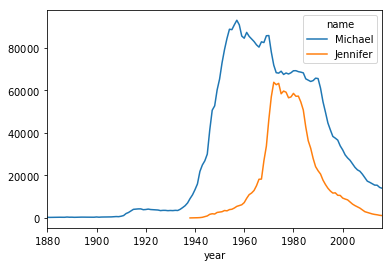

In [23]:
subset = total_births[["Michael", "Jennifer"]]
subset.plot()

# Exercises

## Q1: unique names

how many unique names appear in our top 1000 list?  Use the `.unique()` method on the "name" `Series` to get a an array (it will actually be a NumPy `ndarray` of objects)

## Q2: gender-neutral names

What are all the names that appear for both boys and girls?

## Q3: name diversity

We want to make a plot of how many names it takes to reach 50% of the births in a given year.  Let's start with the boys names:

In [24]:
boys = top[top.sex == "M"]

Now, to understand the process, let's work just on a particular year, 2015

In [25]:
b15 = boys[boys.year == 2015]

In [26]:
b15.info

<bound method DataFrame.info of                        name sex  births  year      prop
year sex                                               
2015 M   1845017       Noah   M   19594  2015  0.010274
         1845018       Liam   M   18330  2015  0.009611
         1845019      Mason   M   16591  2015  0.008699
         1845020      Jacob   M   15914  2015  0.008344
         1845021    William   M   15863  2015  0.008317
         1845022      Ethan   M   15049  2015  0.007891
         1845023      James   M   14773  2015  0.007746
         1845024  Alexander   M   14507  2015  0.007606
         1845025    Michael   M   14396  2015  0.007548
         1845026   Benjamin   M   13670  2015  0.007168
         1845027     Elijah   M   13593  2015  0.007127
         1845028     Daniel   M   13464  2015  0.007060
         1845029      Aiden   M   13429  2015  0.007041
         1845030      Logan   M   12897  2015  0.006762
         1845031    Matthew   M   12717  2015  0.006668
         1845032

We'll use the `cumsum()` property to do a cumulative sum over the `prop` column we added previously

In [27]:
prop_cumsum = b15.sort_values(by="prop", ascending=False)["prop"].cumsum()

and now we can use `searchsorted` to return the position where "if the corresponding elements in v were inserted before the indices, the order of self would be preserved." (see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.searchsorted.html)

In [28]:
prop_cumsum.searchsorted(0.5)

array([134])

Since we start counting at 0, we add 1 to this to get the number of names needed in this year to reach 50% of births.

Now generalize this to a function that you can use `apply()` on and make a plot of the number of names to reach 50% by year